<a href="https://colab.research.google.com/github/Saitharun1428/bitcoin-price-prediction/blob/main/stock_price_prediction_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.9 MB/s eta 

In [ ]:
import gradio as gr

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import os


In [ ]:
pip install yfinance

In [ ]:
ticker="BTC"
start_date="2020-01-01"
end_date="2024-02-02"
data=yf.download(ticker,start=start_date,end=end_date)
print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close  Adj Close  Volume
Date                                                                         
2020-10-01  100.000000  100.000000  100.000000  100.000000  95.702148       0
2020-10-02  100.000000  100.000000  100.000000  100.000000  95.702148       0
2020-10-05  100.029999  100.040001   99.995003   99.995003  95.697372   10725
2020-10-06  100.010002  100.029999  100.010002  100.029999  95.730873   10080
2020-10-07   99.949997   99.959999   99.919998   99.919998  95.625595    6350
...                ...         ...         ...         ...        ...     ...
2024-01-26   91.980003   92.050003   91.980003   91.995003  91.437393    1197
2024-01-29   92.237396   92.237396   92.237396   92.237396  91.678314      59
2024-01-30   92.159798   92.159798   92.159798   92.159798  91.601189     122
2024-01-31   92.592903   92.592903   92.503601   92.503601  91.942909     637
2024-02-01   92.730003   92.944801   92.730003   92.820801  92.2

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,95.702148,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,95.702148,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730873,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625595,6350


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-26,91.980003,92.050003,91.980003,91.995003,91.437393,1197
2024-01-29,92.237396,92.237396,92.237396,92.237396,91.678314,59
2024-01-30,92.159798,92.159798,92.159798,92.159798,91.601189,122
2024-01-31,92.592903,92.592903,92.503601,92.503601,91.942909,637
2024-02-01,92.730003,92.944801,92.730003,92.820801,92.258186,13928


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839 entries, 2020-10-01 to 2024-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       839 non-null    float64
 1   High       839 non-null    float64
 2   Low        839 non-null    float64
 3   Close      839 non-null    float64
 4   Adj Close  839 non-null    float64
 5   Volume     839 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.9 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,94.879808,94.903582,94.854725,94.878194,91.625000,3335.460072
std,3.830072,3.820196,3.833413,3.825265,3.010979,23892.485310
min,88.430496,88.430496,88.430496,88.430496,85.702904,0.000000
25%,91.562450,91.579800,91.522999,91.549599,89.111595,7.000000
50%,93.529900,93.544998,93.459999,93.479698,90.743698,150.000000
75%,99.032497,99.062000,99.001152,99.059998,94.862743,891.500000
max,100.889999,100.889999,100.154999,100.154999,95.850494,356863.000000


In [ ]:
df['date']=pd.to_datetime(df.index)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,95.702148,0,2020-10-01
2020-10-02,100.000000,100.000000,100.000000,100.000000,95.702148,0,2020-10-02
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725,2020-10-05
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730873,10080,2020-10-06
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625595,6350,2020-10-07


In [ ]:
import plotly.graph_objects as go

fig=go.Figure(data=[go.Candlestick(x=df['date'],
open=df['Open'],
high=df['High'],
low=df['Low'],
close=df['Close'])])

#Customize the chart Layout
fig.update_layout(
    title='stock price chart BTC',
    yaxis_title='price ($)',
    xaxis_rangeslider_visible=False
)

#Display the chart fig.show()
fig.show()

In [ ]:
df.drop(['date','Volume'],axis=1,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

<Axes: >

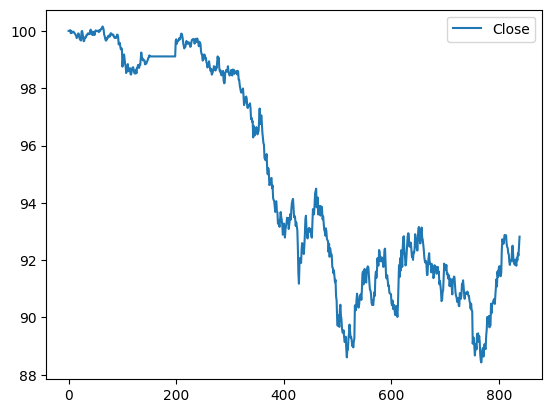

In [ ]:
df.plot.line(y="Close",use_index=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


#Split the dataset into training and testing sets
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close']]

y = df['Close'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Build the Random Forest Regression model

rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model

rf.fit(X_train, y_train)

#Make predictions on the testing set y_pred rf.predict(X_test)
y_pred=rf.predict(X_test)
#evalulate the model using mean squarred error
mse=mean_squared_error(y_test,y_pred)
print('mean squared error:',mse)

mean squared error: 0.0008859350738866784


In [ ]:
def predict_stock_price(open_price, close_price, high_price, low_price, adj_close):
    new_data = np.array([[open_price, close_price, high_price, low_price, adj_close]])
    predicted_price = rf.predict(new_data)
    return predicted_price[0]

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_stock_price,
    inputs=["text", "text", "text", "text", "text"],
    outputs="text",

    title="Stock Price Prediction",
    description="Enter the values for Open, Close, High, Low, and Adj Close to predict the stock price.",

)




# Launch the Gradio interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6593d3d1aba3889bd9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
